In [9]:
# convert tifs to .npy file 

import os
import numpy as np
import imageio as misc # I think this is deprecated, we'll see!
import matplotlib.pyplot as plt


def getData(myDir,myCurDir):
    myStart = 0
    for myFile in myCurDir:
        myTempImg = misc.imread(myDir+myFile)
        myTempImg = myTempImg[:,:,0]
        if myStart == 0:
            myDimX = np.shape(myTempImg)[0]
            myDimY = np.shape(myTempImg)[1]
            myData = np.reshape(myTempImg, (1,myDimX, myDimY))
            myStart = 1
        else:
            myData = np.append(myData,np.reshape(myTempImg, (1,myDimX, myDimY)),axis=0)
    return myData


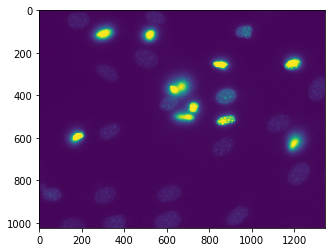

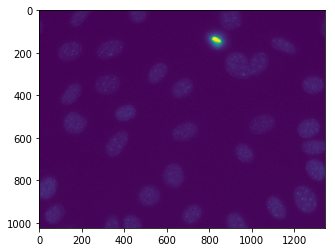

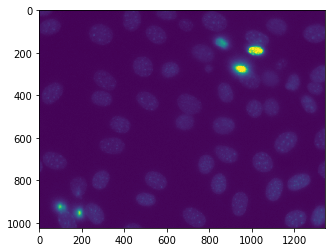

In [15]:

# get a list
"""data from Coelho, Shariff, and Murphy. 'NUCLEAR SEGMENTATION IN MICROSCOPE CELL IMAGES: 
A HAND-SEGMENTED DATASET AND COMPARISON OF ALGORITHMS' IEEE (2009)"""
myDir = "../datasets/coelhoMurphy2009/images/dna-images/gnf/"
myCurDir = os.listdir(myDir)

myData1 = getData(myDir,myCurDir)

myDir = "../datasets/coelhoMurphy2009/images/dna-images/ic100/"
myCurDir = os.listdir(myDir)


myData2 = getData(myDir,myCurDir)

# check if we did it right
for ck in range(0,3):
    plt.figure()
    plt.imshow(myData[ck,...])
plt.show()

# combine the two datasets
myData = np.append(myData1[:,0:1024,0:1344],myData2[:,0:1024,0:1344],axis=0)

In [16]:
# save the data

np.save("./coelhoData.npy",myData)